# Part I - Ford GoBike System Data Exploration 
## by Bolu Okelola

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, in February 2019



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Check for the summary stats of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

#### Information on user_type

Subscribers have accounts created, while customers rent the bikes when the need arises

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Cleaning steps
1. Start and end times should be converted to the DATETIME format
2. The birth years of the members should be converted to integers (to allow for calculations)
3. The columns sharing information about:
       a. the stations were the trips started and ended are missing 197 rows,
       b. members genders and birthyear are missing 8265 rows.
    Drop the null values
4. Convert the stations and bike ids to object
5. Create a new column:
       a. for the ages of the members
       b. duration in minutes
6. From the start_time column, generate new columns for the:
       a. start date, 
       b. start weekday 
       c. start hour
7. Drop irrelevant columns:
       a. start_station_latitude 
       b. start_station_longitude
       c. end_station_latitude
       d. end_station_longitude
       e. member_birth_year

In [8]:
#Make a copy before cleaning the data
gobike=df.copy()

### Download the copy as a .csv file
#### To be used in the slide deck

Reference: https://www.kaggle.com/code/arkaung/download-csv-file

In [9]:
#import relevant libraries
from IPython.display import HTML

#create a csv file of the copied version
gobike.to_csv('submission.csv')

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')

In [10]:
#check for duplicates
gobike.duplicated().sum()

0

There are no duplicates

In [11]:
#check for (the count of) null values
gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
#drop the null values
gobike.dropna(axis=0, inplace=True)

In [13]:
#Test the code
gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
#Fixing the data types
gobike.start_station_id = gobike.start_station_id.astype('str')
gobike.end_station_id = gobike.end_station_id.astype('str')
gobike.bike_id = gobike.bike_id.astype('str')

gobike.member_birth_year = gobike.member_birth_year.astype('int')

In [15]:
gobike["start_time"]=pd.to_datetime(gobike["start_time"], format='%Y-%m-%d %H:%M:%S')
gobike["end_time"]=pd.to_datetime(gobike["end_time"], format='%Y-%m-%d %H:%M:%S')

In [16]:
gobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [17]:
#Create a column for the ages of the riders
gobike['member_age'] = 2019 - gobike['member_birth_year']

#### Information on age
There seems to be a large gap between the 50th/75th percentiles and the max of the age columns; it appears to be outliers. We'll restrict the age of the users to 75

In [18]:
gobike.drop(gobike[(gobike.member_age > 75 )].index, inplace = True)

In [19]:
gobike.member_age.describe()

count    174689.000000
mean         34.107729
std           9.841508
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          75.000000
Name: member_age, dtype: float64

In [20]:
#create a new column for duration in minutes
gobike['duration_minute'] = gobike['duration_sec']/60
#round the values
gobike['duration_minute']=gobike['duration_minute'].apply(np.ceil)

In [21]:
#change the data type to integer
gobike['duration_minute']=gobike['duration_minute'].astype(int)

In [22]:
gobike.duration_minute.describe()

count    174689.000000
mean         12.230369
std          27.389438
min           2.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        1410.000000
Name: duration_minute, dtype: float64

In [23]:
#convert to Index using specified date_format with dt.strftime
gobike['start_date'] = gobike.start_time.dt.strftime('%Y-%m-%d')
gobike['start_dayofweek'] = gobike.start_time.dt.strftime('%A')
gobike['start_hourofday'] = gobike.start_time.dt.strftime('%H')

In [24]:
#drop irrelavant columns
gobike.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude',
         'end_station_longitude', 'member_birth_year'], axis=1, inplace=True)

In [25]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174689 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174689 non-null  int64         
 1   start_time               174689 non-null  datetime64[ns]
 2   end_time                 174689 non-null  datetime64[ns]
 3   start_station_id         174689 non-null  object        
 4   start_station_name       174689 non-null  object        
 5   end_station_id           174689 non-null  object        
 6   end_station_name         174689 non-null  object        
 7   bike_id                  174689 non-null  object        
 8   user_type                174689 non-null  object        
 9   member_gender            174689 non-null  object        
 10  bike_share_for_all_trip  174689 non-null  object        
 11  member_age               174689 non-null  int64         
 12  duration_minute 

In [26]:
gobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'member_age',
       'duration_minute', 'start_date', 'start_dayofweek', 'start_hourofday'],
      dtype='object')

In [27]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_dayofweek,start_hourofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,870,2019-02-28,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,1031,2019-02-28,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30,609,2019-02-28,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,27,2019-02-28,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,60,30,2019-02-28,Thursday,23


### What is the structure of your dataset?
After the necessary cleaning steps:
1. There are 174689 entries and 16 columns.
2. The data types of the columns span across objects, integers, datetime and floats.
3. The dataset provides information on the bike and their stations, users and the trips taken

### What is/are the main feature(s) of interest in your dataset?
Some areas of interest include:
1. The trip durations
2. User information

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
1. start_station_id,
2. end_station_id,
3. member_age
4. member_gender
5. duration_sec
6. duration_minute

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### 1
What is the distribution of the trips by duration (in seconds)?

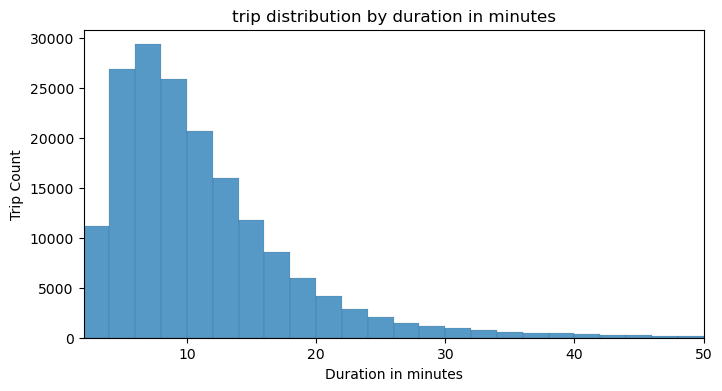

In [28]:
#setting the bins
bins= np.arange(2, gobike.duration_minute.max()+2, 2)
#plot the histogram
plt.figure(figsize = (8, 4))
sns.histplot(data=gobike, x="duration_minute", bins=bins)
plt.xlim(2, 50)
plt.title("trip distribution by duration in minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Trip Count');

In [29]:
len(gobike[gobike["duration_minute"] <= 30]) / len(gobike["duration_minute"]) * 100

96.55902775790118

The histogram is right skewed; approximately 97% of the trips were euqal to or less than 30mins, with the peak at the 6-8 mins mark

### 2
From which stations are the most trips taken?

In [30]:
#set the color and order
base_color=sns.color_palette()[0]
base_order = gobike.start_station_name.value_counts().head(50).index

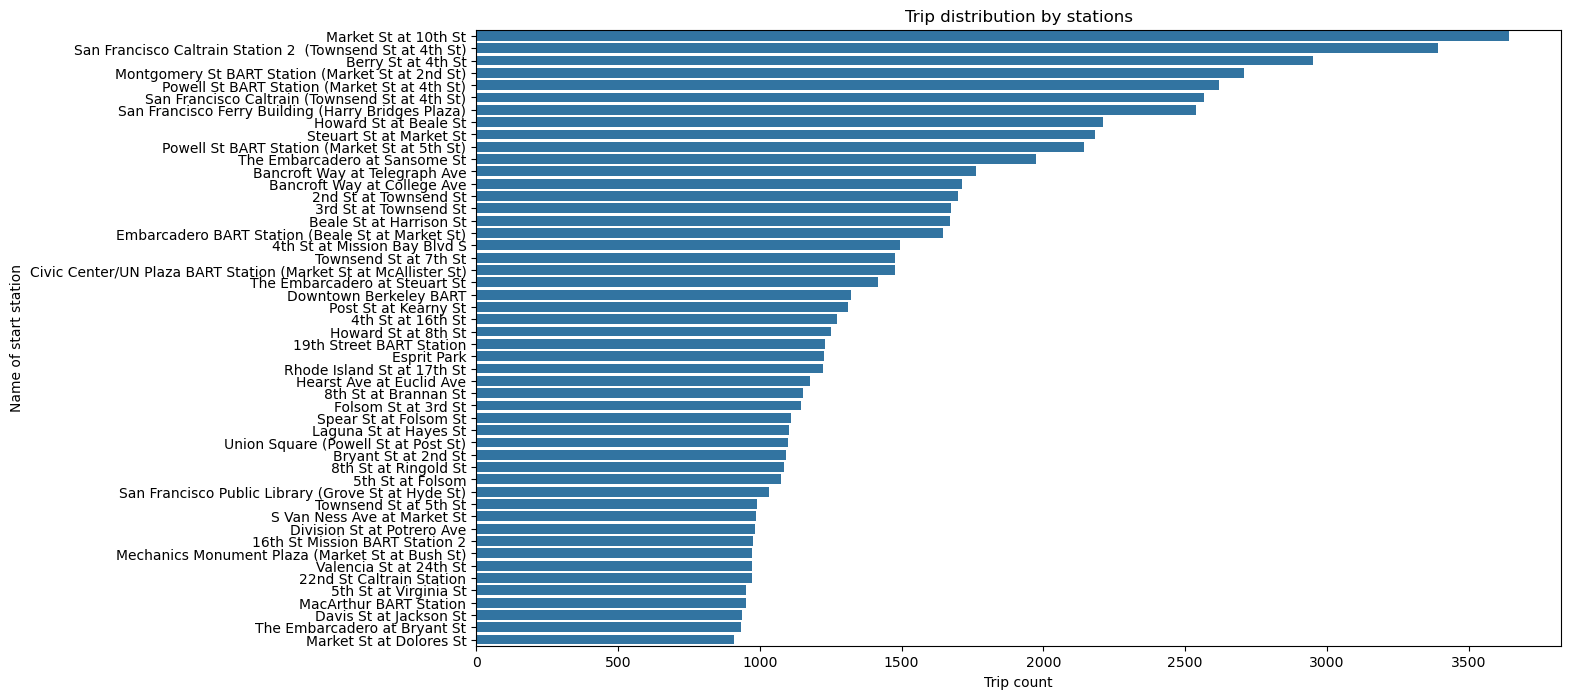

In [31]:
plt.figure(figsize=[14, 8])
sns.countplot(data=gobike , y='start_station_name' , color=base_color , order=base_order)
plt.xlabel('Trip count')
plt.ylabel('Name of start station')
plt.title("Trip distribution by stations");

The three most popular stations are at:
1. Market St
2. San Francisco Caltrain Station 2
3. Berry St

### 3
What age group took the most or least trips?

<Figure size 400x400 with 0 Axes>

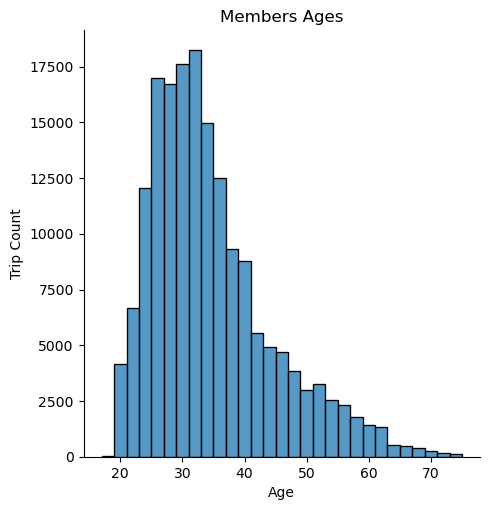

In [32]:
#setting the bins
bins=np.arange(17, gobike.member_age.max()+2, 2)
#plot the histogram
plt.figure(figsize=(4,4))
sns.displot(gobike.member_age, kind="hist", bins=bins);
plt.xlabel('Age')
plt.ylabel('Trip Count')
plt.title('Members Ages');

The histogram is a right skewed, unimodal one:
1. The larger portion of the trips were taken by users within the middle ages (24-40), with the peak at 32 years
2. The older the users got, the less trips were taken using gobikes

### 4
Did Subscribers or customers take more trips?

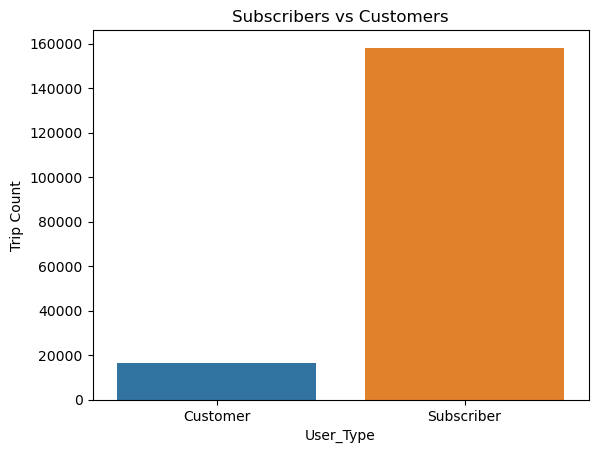

In [33]:
#A histogram showing the trip count by user_type
sns.countplot(data=gobike, x='user_type')
x_labels=['16553', '158136']
plt.xlabel('User_Type')
plt.ylabel('Trip Count')
plt.title('Subscribers vs Customers');

In [34]:
len(gobike[gobike["user_type"] == "Subscriber"]) / len(gobike["user_type"]) * 100

90.52430319024094

We see that subscribers took the most trips at 90.5%

### 5
What gender took the most trips?

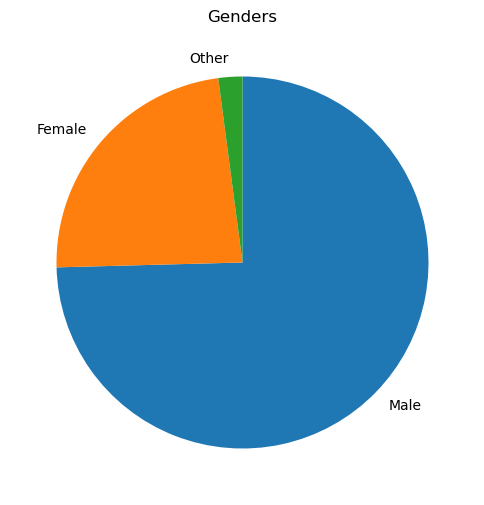

In [35]:
#A pie chart showing the trip count by genders
plt.figure(figsize=(6,8))
sorted_genders = gobike['member_gender'].value_counts()
plt.pie(sorted_genders, labels = ['Male', 'Female', 'Other'], startangle = 90, counterclock=False) 
plt.title('Genders');

In [36]:
len(gobike[gobike["member_gender"] == "Male"]) / len(gobike["member_gender"]) * 100

74.58340250387832

Members that identify as men took the highest number of trips, at 74.5%

### 6
On what day of the week were more trips taken?

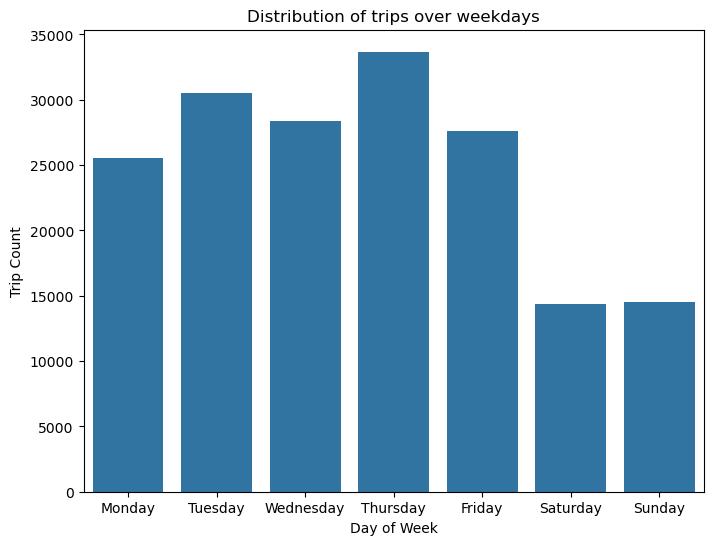

In [37]:
# set the weekday variable
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
gobike['start_dayofweek'] = gobike['start_dayofweek'].astype(weekday_categ)
# plot
plt.figure(figsize = (8,6))
sns.countplot(data=gobike, x='start_dayofweek', color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title("Distribution of trips over weekdays");

There isn't a particular usage trend across the days of the week; but there is a visible decline in the number of trips taken during the weekends (on Saturdays and Sundays)



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Most (97%) of the trips taken were less than 30 minutes
2. There are more men than women in the dataset. This could have resulted in the larger proportion of trips taken by males
3. Generally, there were more susbcribers than customers in the dataset. Approximately, 91% of the users were subscribers
4. It's surprising to see the low count of trips taken on Mondays 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. The start_time column was broken down into the dates, days of the week and hours of the day to draw insights into what particular days/periods more trips were taken.
2. It's not very realistic that older people would ride bikes, so I restricted the age range to 75
3. I converted the duration (in seconds) to minutes

In [38]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_dayofweek,start_hourofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,870,2019-02-28,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,1031,2019-02-28,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30,609,2019-02-28,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,27,2019-02-28,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,60,30,2019-02-28,Thursday,23


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 7
Distribute the trip duration (in minutes) by the genders

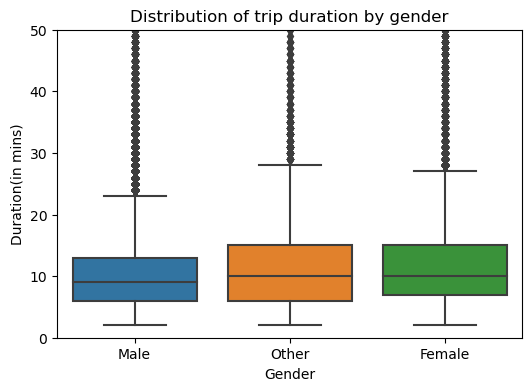

In [39]:
plt.figure(figsize = (6,4))
sns.boxplot(data=gobike, x='member_gender', y='duration_minute')
plt.ylim(0,50)
plt.xlabel('Gender')
plt.ylabel('Duration(in mins)')
plt.title('Distribution of trip duration by gender');

1. Riders with genders specified as "other", took the longest trips
2. The average trips taken by all three genders were  close, at around 10 minutes
3. Collectively, men took the shortest trips, at approx. 24 mins

### 8
Distribute the trip duration (in minutes) by the user type

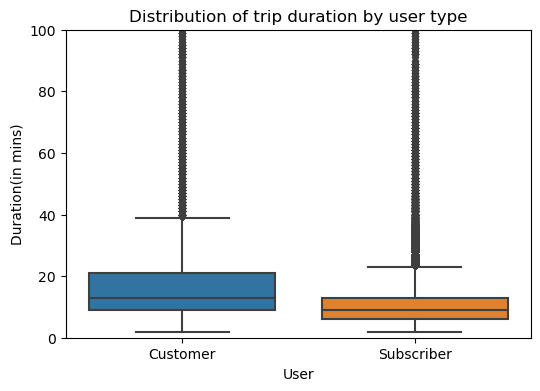

In [40]:
plt.figure(figsize = (6,4))
sns.boxplot(data=gobike, x='user_type', y='duration_minute')
plt.ylim(0,100)
plt.xlabel('User')
plt.ylabel('Duration(in mins)')
plt.title('Distribution of trip duration by user type');

1. On the average, customers (riders without an account) took the longest trips, at approximately 40 mins, although not very repeatedly
2. The range (MAX-MIN) of trips taken by subscribers was about 20 mins 

### 9
Distribute the trip duration (in minutes) by the age

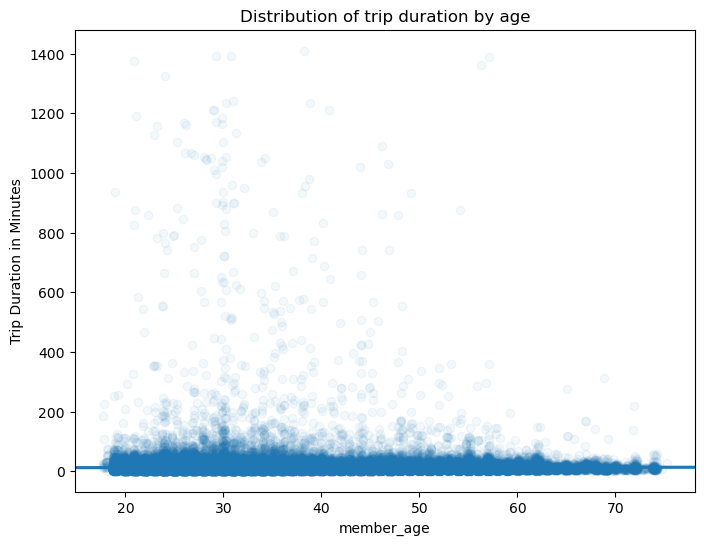

In [41]:
plt.figure(figsize=[8, 6])
#plt.scatter(data=gobike, x="member_age", y="duration_minute", alpha=1/20)
sns.regplot(data = gobike, x = 'member_age', y = 'duration_minute', truncate=False, 
            x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.ylabel('Trip Duration in Minutes')
plt.title('Distribution of trip duration by age');

The cluster of data points across ages 20 to 40 indicates that riders within those ages took the longest trips

### 10
What is the distribution of the different user types by ages?

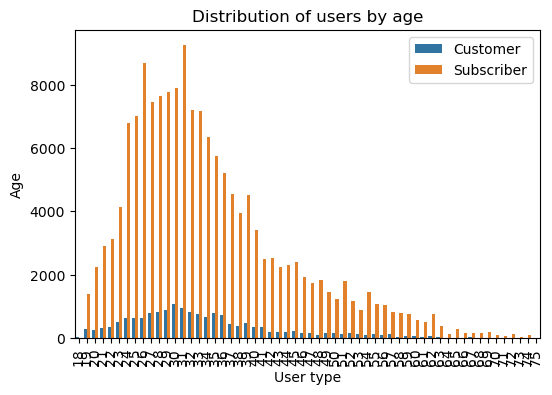

In [56]:
plt.figure(figsize=[6, 4])
sns.countplot(data = gobike, x = 'member_age', hue = 'user_type')
plt.xlabel('User type')
plt.ylabel('Age')
plt.title('Distribution of users by age')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

1. The distribution is unimodal and right skewed across both user types; indicating that most users are within the early ages
2. Subscribers have a wider range of ages while Customers tends to have mostly younger users (with the peak age being around 30-31 years)

### 11
Which users took what trip on the days of the week?

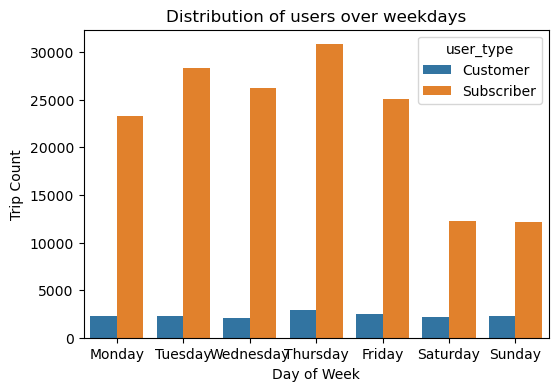

In [43]:
plt.figure(figsize = (6,4))
sns.countplot(data=gobike, x='start_dayofweek', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title("Distribution of users over weekdays");

1. We know that there are more subscribers than users, which is reflected in this bar chart.
2. The peak of Thursday, being the day on which most trips are taken, can be attributed to the subscribers

### 12
At what time of the day are most trips occuring?

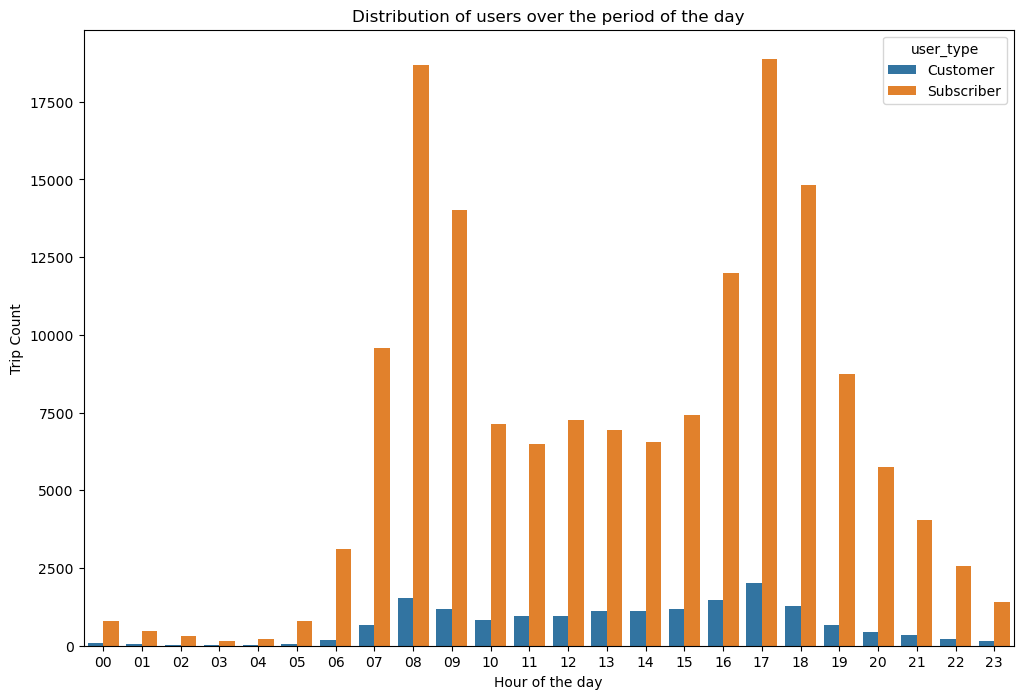

In [44]:
#set the hour variable
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', 
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
gobike['start_hourofday'] = gobike['start_hourofday'].astype(hour_categ)
#plot
plt.figure(figsize = (12,8))
sns.countplot(data=gobike, x='start_hourofday', hue='user_type')
plt.xlabel('Hour of the day')
plt.ylabel('Trip Count')
plt.title("Distribution of users over the period of the day");

1. We see the peak hours being 8am (which is genrally the times at which most people need to get to work), and 6pm (when most would return home from work)
2. There's very low usage in the wee hours of midnight to 5am

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The larger percentage of users are subscribers
2. The number of trips taken decreases with the age of the users

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. The peak day of usage is Thursday, not Monday

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 13
What is the duration of trips taken by the different users, by gender?

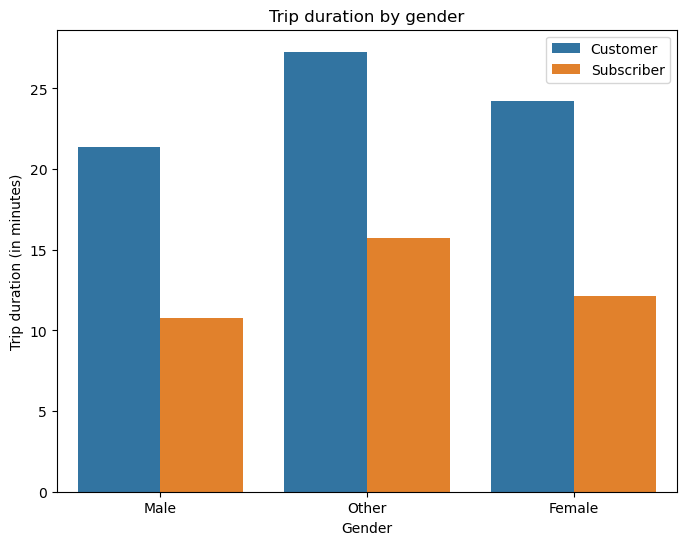

In [45]:
plt.figure(figsize = (8,6))
sns.barplot(data=gobike, x='member_gender',y = "duration_minute", hue='user_type', ci=None)
plt.ylabel('Trip duration (in minutes)')
plt.xlabel('Gender')
plt.title("Trip duration by gender")
plt.legend(loc='upper right');

The riders (both customers and subscribers) who didn't specify their genders seem to have taken the longest trips, across all borders. This is closely follwed by the female customers

### 14
What is the duration of trips taken by usertype on the different days?

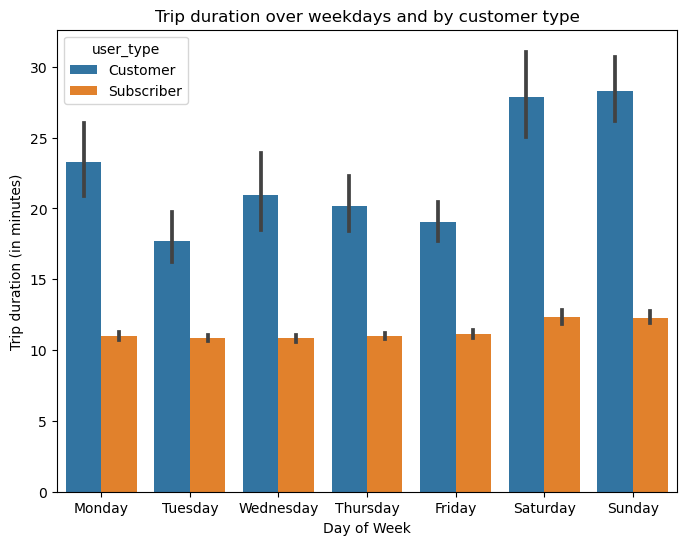

In [60]:
plt.figure(figsize = (8,6),dpi=100)
sns.barplot(data = gobike, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Trip duration (in minutes)')
plt.title("Trip duration over weekdays and by customer type");

1. As established, customers took their longest trips during the weekends
2. The duration of trips taken by subscribers seem to be consistent, possibly with their rides maintaining the route of home to work and back.

### 15
What is the duration of trips taken by usertype at the different time of day?

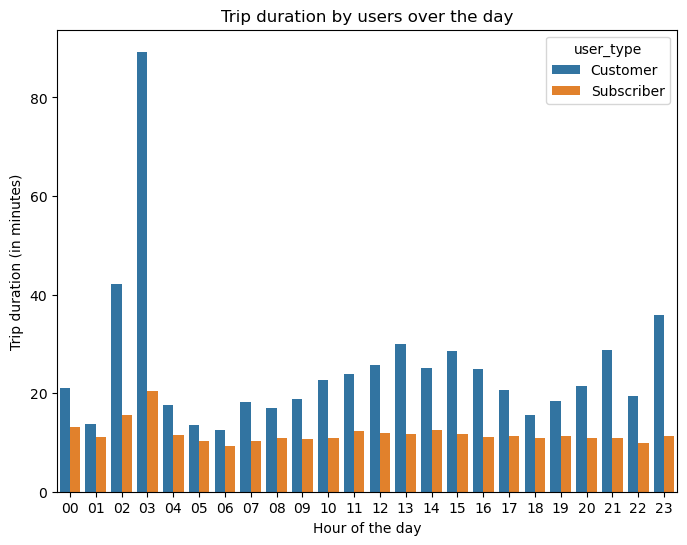

In [61]:
plt.figure(figsize = (8,6), dpi=100)
sns.barplot(data=gobike, x='start_hourofday',y = "duration_minute", hue='user_type', ci=None)
plt.xlabel('Hour of the day')
plt.ylabel('Trip duration (in minutes)')
plt.title("Trip duration by users over the day");

Customers seem to be taking longer trips during the middle of the night, with a peak at 3am and then dropping till the early afternoons.

### 16
What is the correlation between the qualitative variables?

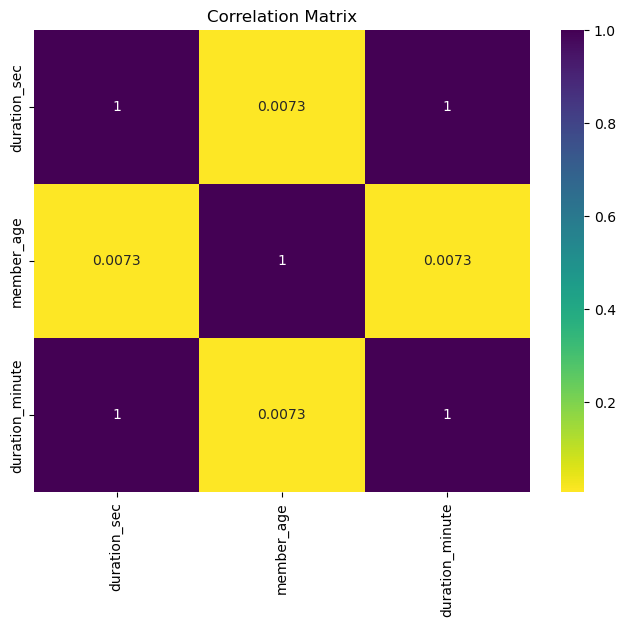

In [48]:
plt.figure(figsize = (8,6))
sns.heatmap(gobike.corr(), cmap = "viridis_r", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90);

We find that there's a weak level of (positive) correlation between the qualitative variables (duration in seconds/minutes, and the ages of members.

### 17
What is the distirbution of bike usage among subscribers and customers during the different times of day across the week?

#### References:
color maps in seaborn: https://seaborn.pydata.org/generated/seaborn.heatmap.html, https://www.geeksforgeeks.org/colormaps-in-seaborn-heatmaps/

In [49]:
#setting the colormap
colormap=sns.color_palette("Oranges")

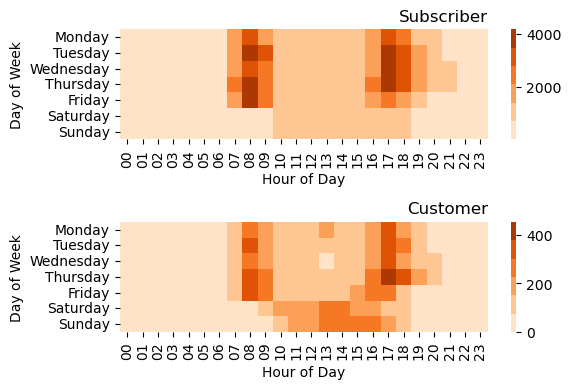

In [50]:
plt.figure(figsize = (6,4))

#create a subplot for subscribers
plt.subplot(2, 1, 1)
Subscriber = gobike[gobike['user_type'] == "Subscriber"] 
ct_counts = Subscriber.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap=colormap);
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#create a subplot for customers
plt.subplot(2, 1, 2)
Customer = gobike[gobike['user_type'] == "Customer"] 
ct_counts = Customer.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap=colormap);
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()
plt.show()

The usage pattern between subscribers and customers is further emphasized here; compare the concentration during the middle of the day and on weekends.
1. We see heavy usage during rush hours, in the case of subscribers with very little rides taken during working hours
2. Rides taken by customers seem to be more spread out, between 7am and 8pm

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. All the categorical variables are positively correlated, although on a weak level.
2. There were very few rides taken by subscribers during the weekends, as opposed to customers who might have gone cycling for pleasure, rather than for work.
3. The same goes for rides taken during the day (within times ordinarily known as working hours: 10am to 4pm).

### Were there any interesting or surprising interactions between features?

1. It is interesting, and would require further analysis, as to the positive correlation between the ages and trip durations.

## Conclusions
This analysis was conducted on a dataset about a bike renting service (Ford GoBike) in the SanFranciso bay area. The users are split between Subscribers (committed riders) and Customers (occasional riders), who used their bikes mostly on the weekdays and weekends respectively.

I carried out an initial wrangling step to:
1. get an overview of the data
2. clean the data to remove null values and variables irrelevant to this analysis

To draw insights from the data, I made use of the three (3) different levels of visualizations:
1. univariate, by the way of histograms (for numerical variables), pie charts, and bar charts (for qualitative factors)
2. bivariate, in form of scatter plots, clustered bar charts, and box plots to see the relationship between two sets of variables
3. multivariate plots, such as adapted heatmaps, clusterd bar charts and a correlation matrix
